In [22]:
import torch
import matplotlib.pyplot as plt
from vap.data.datamodule import VAPDataset
from vap.utils.plot import plot_melspectrogram, plot_vad

from IPython.display import Audio

In [31]:
def plot_sample(d):
    fig, ax = plt.subplots(2, 1)
    plot_melspectrogram(d["waveform"], ax=ax[:2])
    # plot vad.
    # VAD is by default longer than the audio (for prediction)
    # See zeros at the end of the waveforms where the VAD is defined but the audio is not.
    x = torch.arange(d["vad"].shape[0]) / dset.frame_hz
    plot_vad(x, d["vad"][:, 0], ax[0], ypad=1, color="b", label="VAD A")
    plot_vad(x, d["vad"][:, 1], ax[1], ypad=1, color="orange", label="VAD A")
    ax[0].set_xticks([])
    ax[0].legend()
    ax[1].legend()
    ax[1].set_xlabel("Time (s)")
    plt.tight_layout()

## Dataset

In [3]:
CSV_PATH = "../example/data/splits/train.csv"
dset = VAPDataset(CSV_PATH)
print("Number of samples:", len(dset))

Number of samples: 159501


### Sample

In [29]:
row = 0 
d = dset[row]
print("Session:", d["session"])
print("Waveform shape:", d["waveform"].shape)
print("VAD shape:", d["vad"].shape)
print("Dataset:", d["dataset"])

Session: CA0c0b4d981b9c154e8abba98f5756bb03-0
Waveform shape: torch.Size([2, 320000])
VAD shape: torch.Size([1100, 2])
Dataset: twilio


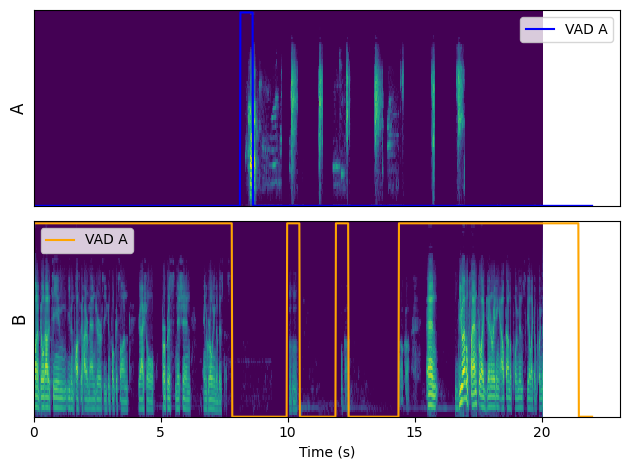

In [30]:
# PLOT A DATASAMPLE
plot_sample(d)
plt.show()
Audio(d['waveform'], rate=16_000, autoplay=True)

Session: CA3290263b73bcd0095f9cf6079d709232-0
Waveform shape: torch.Size([2, 320000])
VAD shape: torch.Size([1100, 2])
Dataset: twilio


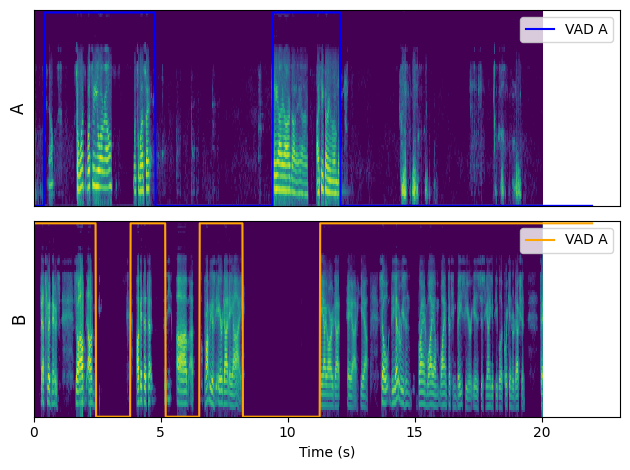

In [20]:
row = torch.randint(0, len(dset), (1,)).item()
d = dset[row]
print("Session:", d["session"])
print("Waveform shape:", d["waveform"].shape)
print("VAD shape:", d["vad"].shape)
print("Dataset:", d["dataset"])
# PLOT A DATASAMPLE
plot_sample(d)
plt.show()